In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# Get the current directory
current_dir = os.getcwd()

# Initialize an empty dictionary to store the DataFrames
data = {}

# Loop through all the files in the directory
for file in os.listdir(current_dir):
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        # Parse the model name and dataset name from the filename
        model_name, train_dataset, test_dataset, method = file[:-4].split('-')
        
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file)
        
        # Store the DataFrame in the dictionary with keys for the model name and dataset name
        # if model_name not in data:
        #     data[model_name] = {}
        # data[model_name][dataset_name] = df

        data[(model_name, train_dataset, test_dataset, method)] = pd.read_csv(file)

In [4]:
data[('llama13b','as21', 'as21', 'vinc')]

,dataset,layer,pseudo_auroc,train_loss,acc_estimate,acc_lower,acc_upper,cal_acc_estimate,cal_acc_lower,cal_acc_upper,...,lr_acc_estimate,lr_acc_lower,lr_acc_upper,lr_cal_acc_estimate,lr_cal_acc_lower,lr_cal_acc_upper,lr_ece,lr_auroc_estimate,lr_auroc_lower,lr_auroc_upper
0,NaN,0,NaN,-0.0000,0.5000,0.4690,0.5310,0.5090,0.4800,0.5440,...,0.5000,0.4690,0.5310,0.5010,0.4978,0.5049,0.0033,0.5001,0.4706,0.5313
1,NaN,1,NaN,-0.0002,0.5000,0.4690,0.5310,0.5090,0.4800,0.5440,...,0.9716,0.9686,0.9747,0.9716,0.9686,0.9747,0.0111,0.9961,0.9959,0.9963
2,NaN,2,NaN,-0.0004,0.5000,0.4690,0.5310,0.5090,0.4800,0.5440,...,0.8889,0.8889,0.8889,0.8889,0.8889,0.8889,0.0565,0.9614,0.9605,0.9623
3,NaN,3,NaN,-0.0013,0.5000,0.4690,0.5310,0.5090,0.4800,0.5440,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
4,NaN,4,NaN,-0.0021,0.5813,0.5547,0.6084,0.5090,0.4800,0.5440,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
5,NaN,5,NaN,-0.0058,0.6707,0.6453,0.6950,0.5204,0.4880,0.5481,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
6,NaN,6,NaN,-0.0132,0.5000,0.4690,0.5310,0.5304,0.5062,0.5520,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
7,NaN,7,NaN,-0.0296,0.5000,0.4690,0.5310,0.5084,0.4787,0.5368,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
8,NaN,8,NaN,-0.0855,0.5000,0.4690,0.5310,0.5084,0.4787,0.5368,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
9,NaN,9,NaN,-0.1300,0.5000,0.4690,0.5310,0.5084,0.4787,0.5368,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000


## arithmetic

This is using prompts of the form:

'The following is a math problem. You will need to answer correctly. Is {{expression}} = {{answer}}, {{"yes or no"}}? ||| {{answer_choices[label]}}'

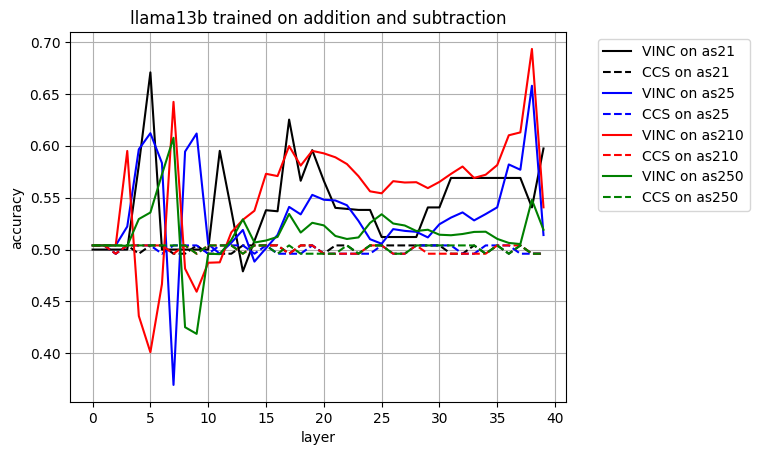

In [5]:
model = 'llama13b'

fig, ax = plt.subplots()
ax.set_title(fr"{model} trained on addition and subtraction")
ax.set_xlabel("layer")
ax.set_ylabel("accuracy")
ax.grid(True)

# Set line colors and styles
line_colors = ['black', 'blue', 'red', 'green', 'orange','purple', 'teal', 'pink', 'sage', 'grey']
ccs_line_style = '--'
lr_line_style = ':'
zs_line_style = '-.'

#for i, dataset in enumerate(['as21', 'as25', 'as210', 'as250', 'as2100', 'as2500','as21000']):
for i, dataset in enumerate(['as21', 'as25', 'as210', 'as250']):
    
    experiment = data[(model, dataset, dataset, 'vinc')]
    layers = experiment['layer']
    acc = experiment['acc_estimate']
    # Set line color for current dataset
    line_color = line_colors[i]
    ax.plot(layers, acc, label=f'VINC on {dataset}', color=line_color)

    experiment = data[(model, dataset, dataset, 'ccs')]
    layers = experiment['layer']
    acc = experiment['acc_estimate']
    ax.plot(layers, acc, label=f'CCS on {dataset}',
             color=line_color, linestyle=ccs_line_style)

    # if 'lm_acc' in experiment.columns:
    #     lm_acc = experiment['lm_acc']
    #     # Set line color and style for zero-shot dataset
    #     ax.plot(layers, lm_acc, label='zero-shot language model output',
    #             color=line_color, linestyle=zs_line_style)

    if 'lr_acc' in experiment.columns:
        lr_acc = experiment['lr_acc_estimate']
        # Set line color and style for logistic regression dataset
        ax.plot(layers, lr_acc, label='logistic regression',
                color=line_color, linestyle=lr_line_style)
                
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()